In [1]:
%%html
<style> table { display: inline-block } </style>

# CAB420 Assigment 2 - Model 2

| Name   | Student Number |
| :---   | :--- |
| Charmi Raval       | N10510702          |
| Leonardo Villamil  | N10411526          |
| Litian Chen        | N9646922           |
| Tace Stewart       | N9654411           |

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras

from tensorflow import keras
from sklearn.utils import class_weight
from sklearn import preprocessing
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, SpatialDropout2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Load Data

In [3]:
# Load data
train = pd.read_csv ('Data/training.csv')
validation = pd.read_csv ('Data/validation.csv')
test = pd.read_csv ('Data/testing.csv')

In [4]:
# Split path, features and label

X_train = train.drop(['filename', 'accent'], axis=1)
path_train = train['filename'].to_numpy()
y_train = train['accent'].to_numpy()

X_val = validation.drop(['filename', 'accent'], axis=1)
path_val = validation['filename'].to_numpy()
y_val = validation['accent'].to_numpy()

X_test = test.drop(['filename', 'accent'], axis=1)
path_test = test['filename'].to_numpy()
y_test = test['accent'].to_numpy()

In [5]:
unique_train = np.unique(y_train)
unique_val = np.unique(y_val)
unique_test = np.unique(y_test)

In [6]:
# Get the label and tranform
labels = np.unique(y_train)

encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

In [7]:
# Calculation of class weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

for i in range(17):
    print('%s - class %s - weight %s\n' %(labels[i], (str(np.unique(y_train)[i])), str(class_weights[i])))

african - class 0 - weight 3.7325975166185876

australia - class 1 - weight 0.9309988842195273

bermuda - class 2 - weight 29.67098703888335

canada - class 3 - weight 1.010343344725347

england - class 4 - weight 0.31900411260902345

hongkong - class 5 - weight 13.43162328870167

indian - class 6 - weight 0.7413558308698973

ireland - class 7 - weight 5.088919288645691

malaysia - class 8 - weight 15.962810656177364

newzealand - class 9 - weight 4.769995191537105

other - class 10 - weight 1.1126620139581256

philippines - class 11 - weight 12.156862745098039

scotland - class 12 - weight 4.539122476994255

singapore - class 13 - weight 35.48489666136725

southatlandtic - class 14 - weight 71.941982272361

us - class 15 - weight 0.12046160758497954

wales - class 16 - weight 15.914438502673796

/home/leonardo/CAB420-env/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16], y=[15  4 15 ... 15  3  6

In [8]:
# To One-hot encode
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [9]:
def eval_model(prediction, y_test, labels, history):
    y_test = np.argmax(y_test, axis=1)
    
    print('Classification Report\n')
    print(classification_report(y_test, prediction))

    print('Confusion Matrix')
    cm = confusion_matrix(y_test, prediction, normalize='true')
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=labels)
    c.plot(ax = ax)

    fig = plt.figure(figsize=[12, 4])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()

    fig = plt.figure(figsize=[12, 4])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['precision'], label="Training Precision")
    ax.plot(history.history['val_precision'], label="Validation Precision")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['recall'], label="Training Recall")
    ax.plot(history.history['val_recall'], label="Validation Recall")
    ax.legend()

## Test Model
### No class weights apply

In [10]:
# Define the keras model
test_model = keras.models.Sequential()
test_model.add(Dense(64, input_dim=45, activation='relu'))
test_model.add(Dense(128, activation='relu'))
test_model.add(Dense(256, activation='relu'))
test_model.add(Dense(128, activation='relu'))
test_model.add(Dense(64, activation='relu'))
test_model.add(Dense(17, activation='softmax', name='output'))

print(test_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2944      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 17)                1105      
Total params: 86,545
Trainable params: 86,545
Non-trainable params: 0
____________________________________________________

In [11]:
test_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]);

In [12]:
history = test_model.fit(X_train, y_train, epochs=160, batch_size=512, validation_data=(X_val, y_val))

.6453 - val_precision: 0.7164 - val_recall: 0.5566
Epoch 73/160
175/175 [==============================] - 1s 6ms/step - loss: 0.9459 - accuracy: 0.6921 - precision: 0.7672 - recall: 0.5973 - val_loss: 1.1432 - val_accuracy: 0.6450 - val_precision: 0.7082 - val_recall: 0.5615
Epoch 74/160
175/175 [==============================] - 1s 6ms/step - loss: 0.9538 - accuracy: 0.6878 - precision: 0.7671 - recall: 0.5927 - val_loss: 1.1736 - val_accuracy: 0.6402 - val_precision: 0.7012 - val_recall: 0.5614
Epoch 75/160
175/175 [==============================] - 1s 6ms/step - loss: 0.9309 - accuracy: 0.6931 - precision: 0.7695 - recall: 0.6026 - val_loss: 1.1189 - val_accuracy: 0.6527 - val_precision: 0.7215 - val_recall: 0.5686
Epoch 76/160
175/175 [==============================] - 1s 6ms/step - loss: 0.9248 - accuracy: 0.6979 - precision: 0.7710 - recall: 0.6097 - val_loss: 1.1249 - val_accuracy: 0.6535 - val_precision: 0.7183 - val_recall: 0.5674
Epoch 77/160
175/175 [=======================

930/930 [==============================] - 1s 1ms/step - loss: 1.2386 - accuracy: 0.6840 - precision: 0.7202 - recall: 0.6491
Classification Report

              precision    recall  f1-score   support

           0       0.46      0.51      0.48       465
           1       0.66      0.57      0.61      1817
           2       0.37      0.21      0.27        53
           3       0.59      0.42      0.49      1682
           4       0.71      0.55      0.62      5455
           5       0.64      0.56      0.60       133
           6       0.61      0.52      0.56      2323
           7       0.68      0.41      0.51       357
           8       0.66      0.42      0.52        97
           9       0.59      0.51      0.55       384
          10       0.72      0.58      0.64      1632
          11       0.23      0.39      0.29       135
          12       0.59      0.52      0.55       386
          13       0.62      0.22      0.33        67
          14       0.38      0.36      0

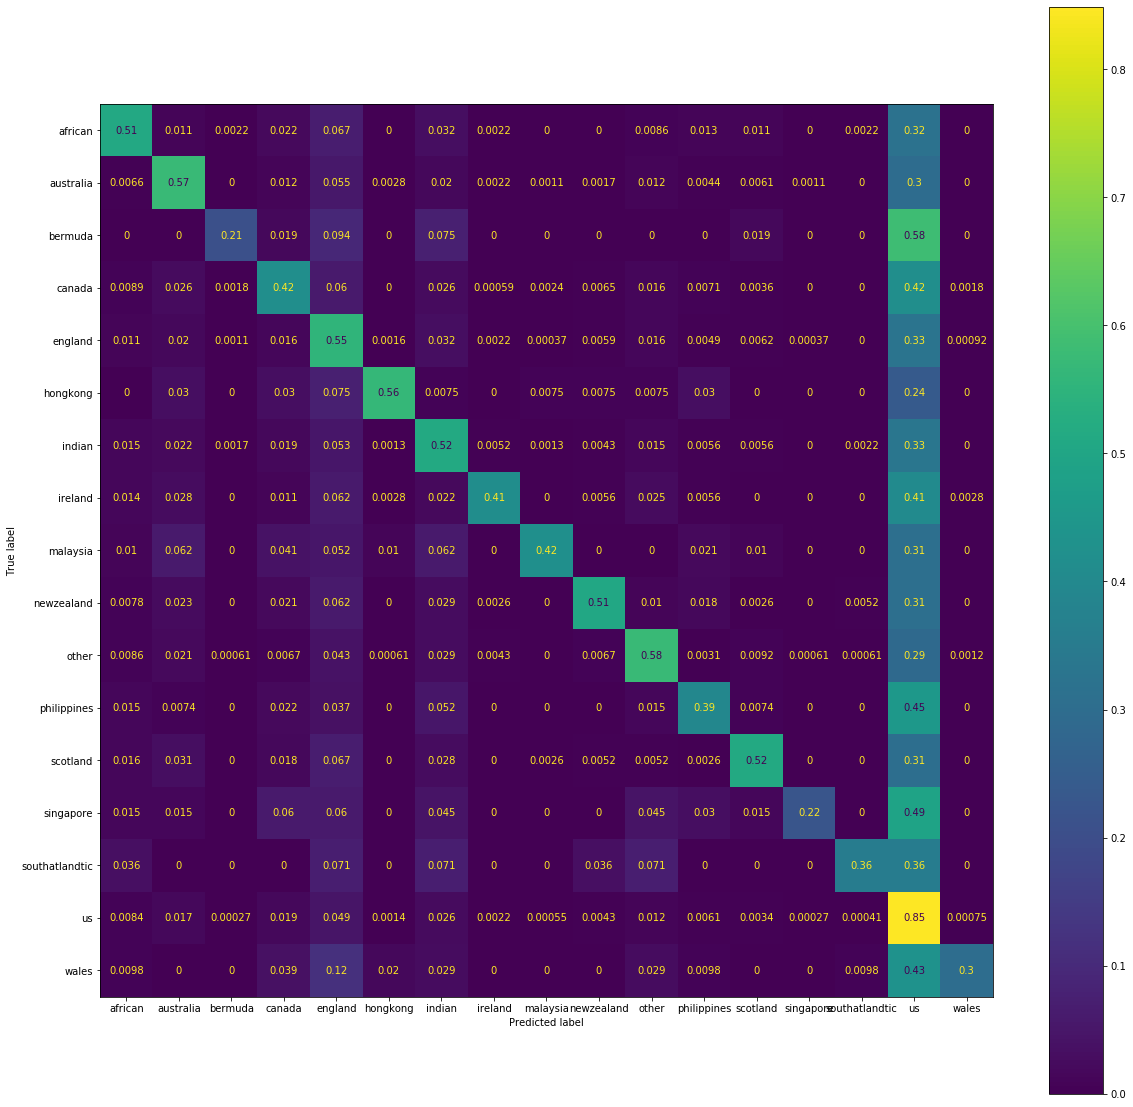

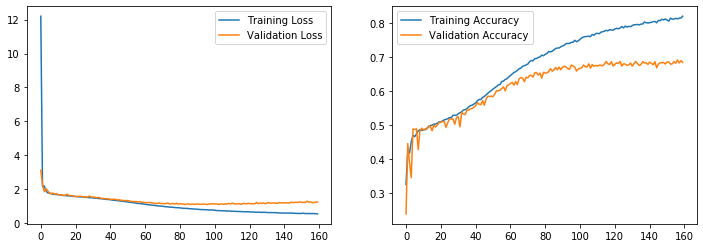

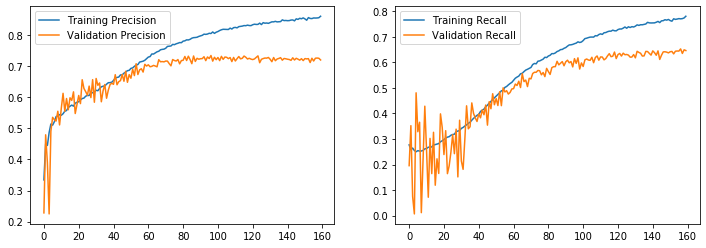

In [13]:
test_scores = test_model.evaluate(X_test, y_test)

prediction = test_model.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## First ANN Model
### Class weights apply

In [14]:
# Define the keras model
ann_model1 = keras.models.Sequential()
ann_model1.add(Dense(64, input_dim=45, activation='relu'))
ann_model1.add(Dense(128, activation='relu'))
ann_model1.add(Dense(256, activation='relu'))
ann_model1.add(Dense(128, activation='relu'))
ann_model1.add(Dense(64, activation='relu'))
ann_model1.add(Dense(17, activation='softmax', name='output'))

print(ann_model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                2944      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 17)                1105      
Total params: 86,545
Trainable params: 86,545
Non-trainable params: 0
__________________________________________________

In [15]:
ann_model1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]);

In [16]:
history = ann_model1.fit(X_train, y_train, epochs=160, batch_size=512, validation_data=(X_val, y_val))

 1s 5ms/step - loss: 11.8940 - accuracy: 0.6937 - precision: 0.7735 - recall: 0.6013 - val_loss: 14.5956 - val_accuracy: 0.6476 - val_precision: 0.7106 - val_recall: 0.5710
Epoch 74/160
175/175 [==============================] - 1s 5ms/step - loss: 11.9181 - accuracy: 0.6926 - precision: 0.7705 - recall: 0.5992 - val_loss: 14.5876 - val_accuracy: 0.6490 - val_precision: 0.7213 - val_recall: 0.5570
Epoch 75/160
175/175 [==============================] - 1s 5ms/step - loss: 11.5741 - accuracy: 0.6999 - precision: 0.7772 - recall: 0.6098 - val_loss: 14.6855 - val_accuracy: 0.6434 - val_precision: 0.7252 - val_recall: 0.5356
Epoch 76/160
175/175 [==============================] - 1s 5ms/step - loss: 11.6015 - accuracy: 0.7015 - precision: 0.7781 - recall: 0.6126 - val_loss: 14.5482 - val_accuracy: 0.6469 - val_precision: 0.7199 - val_recall: 0.5550
Epoch 77/160
175/175 [==============================] - 1s 6ms/step - loss: 11.2574 - accuracy: 0.7088 - precision: 0.7822 - recall: 0.6223 - v

930/930 [==============================] - 1s 1ms/step - loss: 16.3728 - accuracy: 0.6799 - precision: 0.7170 - recall: 0.6444
Classification Report

              precision    recall  f1-score   support

           0       0.61      0.51      0.56       465
           1       0.56      0.60      0.58      1817
           2       0.30      0.21      0.24        53
           3       0.57      0.43      0.49      1682
           4       0.67      0.60      0.63      5455
           5       0.71      0.55      0.62       133
           6       0.58      0.54      0.56      2323
           7       0.52      0.48      0.50       357
           8       0.55      0.39      0.46        97
           9       0.70      0.42      0.53       384
          10       0.69      0.57      0.62      1632
          11       0.48      0.19      0.27       135
          12       0.60      0.51      0.55       386
          13       0.58      0.33      0.42        67
          14       0.42      0.36      

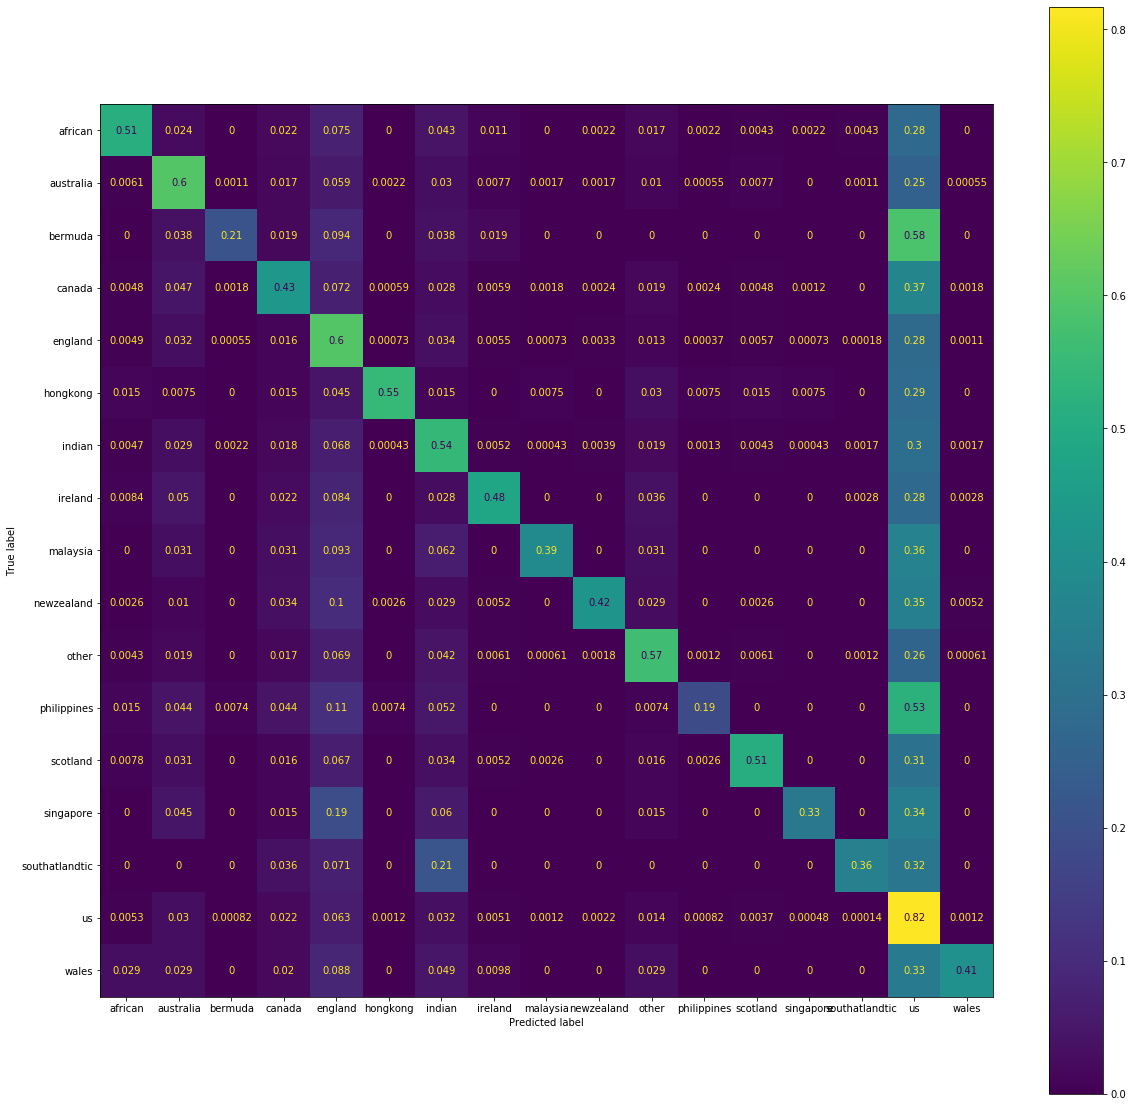

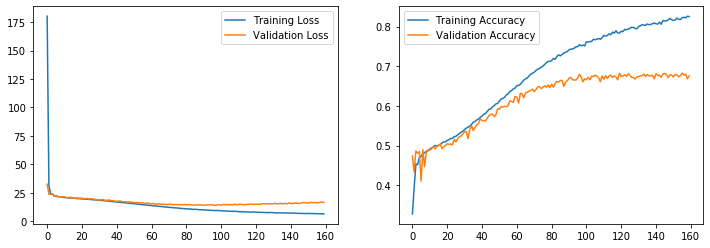

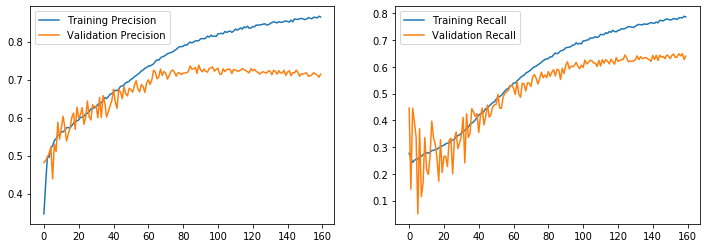

In [17]:
test_scores = ann_model1.evaluate(X_test, y_test)

prediction = ann_model1.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## Second ANN Model
### Class weights apply with a more complex model

In [18]:
# Define the keras model
ann_model2 = keras.models.Sequential()
ann_model2.add(Dense(64, input_dim=45, activation='relu'))
ann_model2.add(Dense(128, activation='relu'))
ann_model2.add(Dense(256, activation='relu'))
ann_model2.add(Dense(512, activation='relu'))
ann_model2.add(Dense(1024, activation='relu'))
ann_model2.add(Dense(2048, activation='relu'))
ann_model2.add(Dense(1024, activation='relu'))
ann_model2.add(Dense(256, activation='relu'))
ann_model2.add(Dense(128, activation='relu'))
ann_model2.add(Dense(64, activation='relu'))
ann_model2.add(Dense(32, activation='relu'))
ann_model2.add(Dense(17, activation='softmax', name='output'))

print(ann_model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                2944      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_15 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_16 (Dense)             (None, 1024)             

In [19]:
ann_model2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]);

In [20]:
history = ann_model2.fit(X_train, y_train, epochs=160, batch_size=512, validation_data=(X_val, y_val))

- loss: 1.6864 - accuracy: 0.9566 - precision: 0.9606 - recall: 0.9536 - val_loss: 29.9933 - val_accuracy: 0.6397 - val_precision: 0.6491 - val_recall: 0.6333
Epoch 75/160
175/175 [==============================] - 23s 132ms/step - loss: 1.5518 - accuracy: 0.9609 - precision: 0.9640 - recall: 0.9580 - val_loss: 30.0508 - val_accuracy: 0.6443 - val_precision: 0.6531 - val_recall: 0.6381
Epoch 76/160
175/175 [==============================] - 24s 135ms/step - loss: 1.4555 - accuracy: 0.9623 - precision: 0.9654 - recall: 0.9599 - val_loss: 28.8430 - val_accuracy: 0.6547 - val_precision: 0.6652 - val_recall: 0.6484
Epoch 77/160
175/175 [==============================] - 23s 133ms/step - loss: 1.1885 - accuracy: 0.9701 - precision: 0.9718 - recall: 0.9684 - val_loss: 29.0416 - val_accuracy: 0.6468 - val_precision: 0.6553 - val_recall: 0.6402
Epoch 78/160
175/175 [==============================] - 24s 134ms/step - loss: 1.1288 - accuracy: 0.9713 - precision: 0.9736 - recall: 0.9693 - val_los

930/930 [==============================] - 8s 8ms/step - loss: 26.6419 - accuracy: 0.6498 - precision: 0.6596 - recall: 0.6421
Classification Report

              precision    recall  f1-score   support

           0       0.65      0.42      0.51       465
           1       0.57      0.52      0.54      1817
           2       0.48      0.28      0.36        53
           3       0.45      0.45      0.45      1682
           4       0.58      0.63      0.61      5455
           5       0.62      0.44      0.52       133
           6       0.56      0.50      0.53      2323
           7       0.52      0.42      0.47       357
           8       0.48      0.43      0.46        97
           9       0.64      0.35      0.46       384
          10       0.68      0.47      0.55      1632
          11       0.39      0.29      0.33       135
          12       0.62      0.42      0.50       386
          13       0.67      0.27      0.38        67
          14       0.27      0.11      

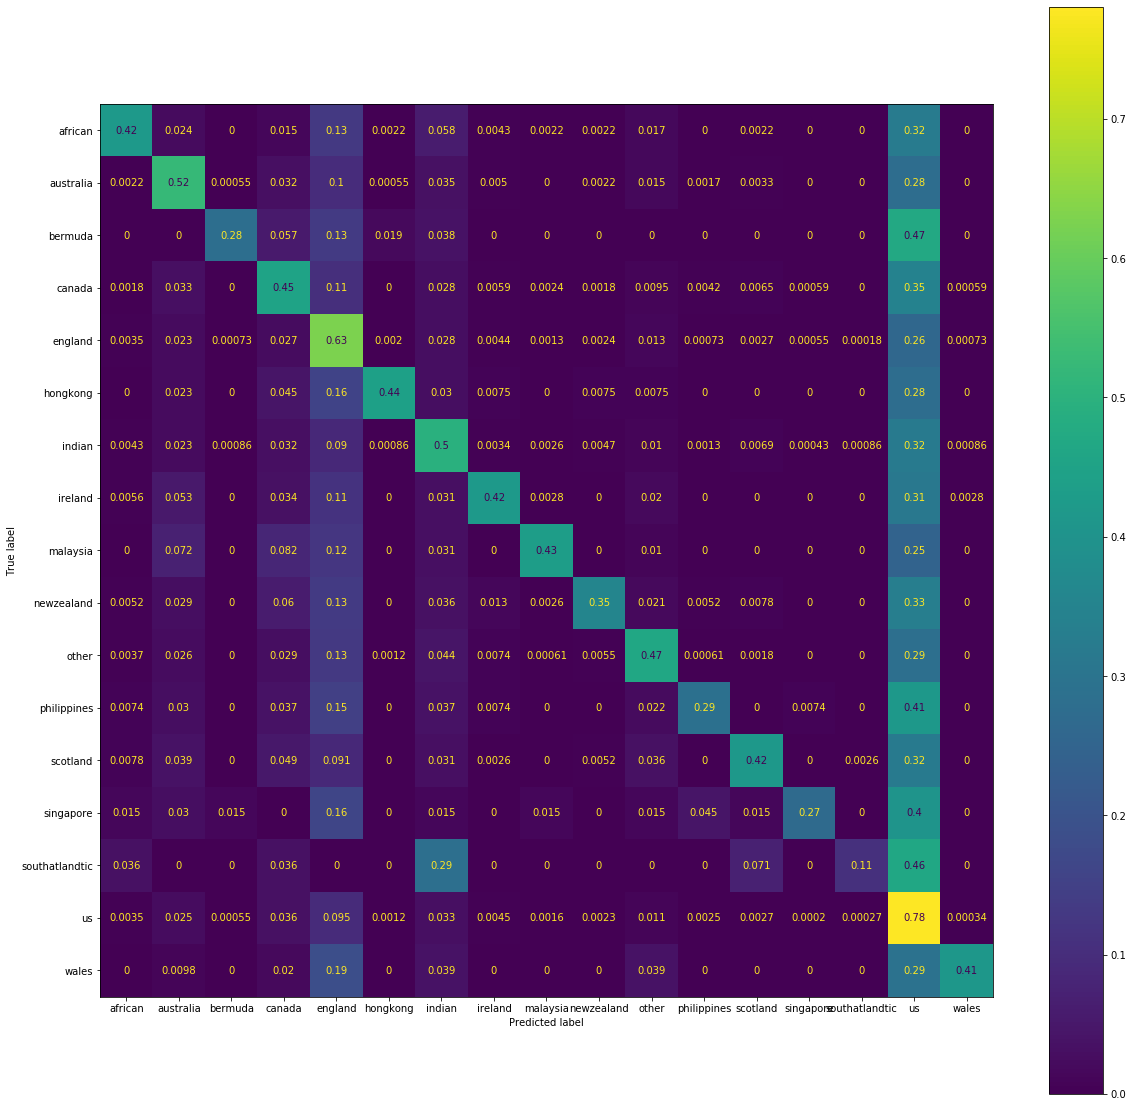

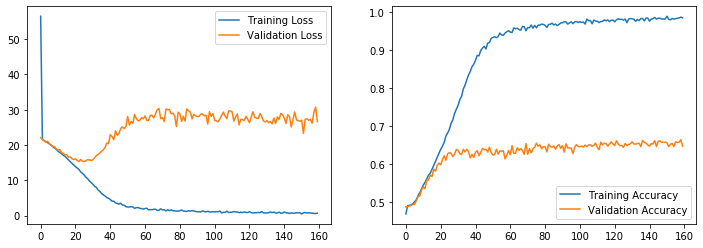

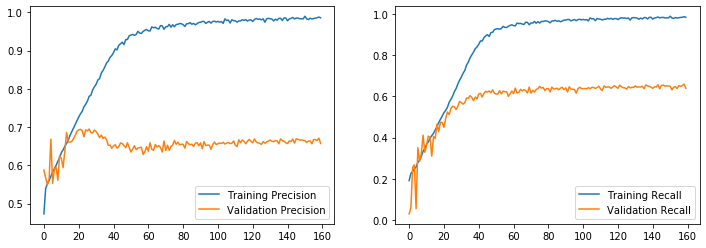

In [21]:
test_scores = ann_model2.evaluate(X_test, y_test)

prediction = ann_model2.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## Third ANN Model
### Complex model with BatchNormalization and Dropout

In [10]:
# Define the keras model
ann_model3 = keras.models.Sequential()
ann_model3.add(Dense(64, input_dim=45, activation='relu'))
ann_model3.add(Dense(128, activation=None))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(256, activation=None))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(512, activation=None))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(1024, activation=None))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(512, activation=None))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(256, activation=None))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(128, activation=None))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(64, activation=None))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(32, activation='relu'))
ann_model3.add(Dense(17, activation='softmax', name='output'))

print(ann_model3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2944      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1

In [11]:
ann_model3.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

In [12]:
history = ann_model3.fit(X_train, y_train, epochs=160, batch_size=512, validation_data=(X_val, y_val))

.6670 - val_precision: 0.7248 - val_recall: 0.6034
Epoch 74/160
175/175 [==============================] - 13s 74ms/step - loss: 10.6138 - accuracy: 0.7215 - precision: 0.7887 - recall: 0.6445 - val_loss: 10.6819 - val_accuracy: 0.7291 - val_precision: 0.7873 - val_recall: 0.6677
Epoch 75/160
175/175 [==============================] - 13s 74ms/step - loss: 10.5014 - accuracy: 0.7264 - precision: 0.7924 - recall: 0.6508 - val_loss: 10.9984 - val_accuracy: 0.7226 - val_precision: 0.7807 - val_recall: 0.6583
Epoch 76/160
175/175 [==============================] - 13s 74ms/step - loss: 10.4907 - accuracy: 0.7257 - precision: 0.7920 - recall: 0.6512 - val_loss: 11.3544 - val_accuracy: 0.7119 - val_precision: 0.7767 - val_recall: 0.6396
Epoch 77/160
175/175 [==============================] - 13s 74ms/step - loss: 10.3933 - accuracy: 0.7276 - precision: 0.7944 - recall: 0.6524 - val_loss: 12.4518 - val_accuracy: 0.6889 - val_precision: 0.7390 - val_recall: 0.6341
Epoch 78/160
175/175 [=======

930/930 [==============================] - 3s 4ms/step - loss: 9.1856 - accuracy: 0.7732 - precision: 0.8185 - recall: 0.7283
Classification Report

              precision    recall  f1-score   support

           0       0.78      0.64      0.70       465
           1       0.82      0.68      0.75      1817
           2       0.68      0.53      0.60        53
           3       0.77      0.57      0.66      1682
           4       0.80      0.68      0.74      5455
           5       0.85      0.68      0.75       133
           6       0.64      0.73      0.69      2323
           7       0.77      0.60      0.68       357
           8       0.87      0.60      0.71        97
           9       0.79      0.66      0.72       384
          10       0.89      0.62      0.73      1632
          11       0.60      0.50      0.54       135
          12       0.80      0.64      0.71       386
          13       0.72      0.58      0.64        67
          14       0.89      0.29      0

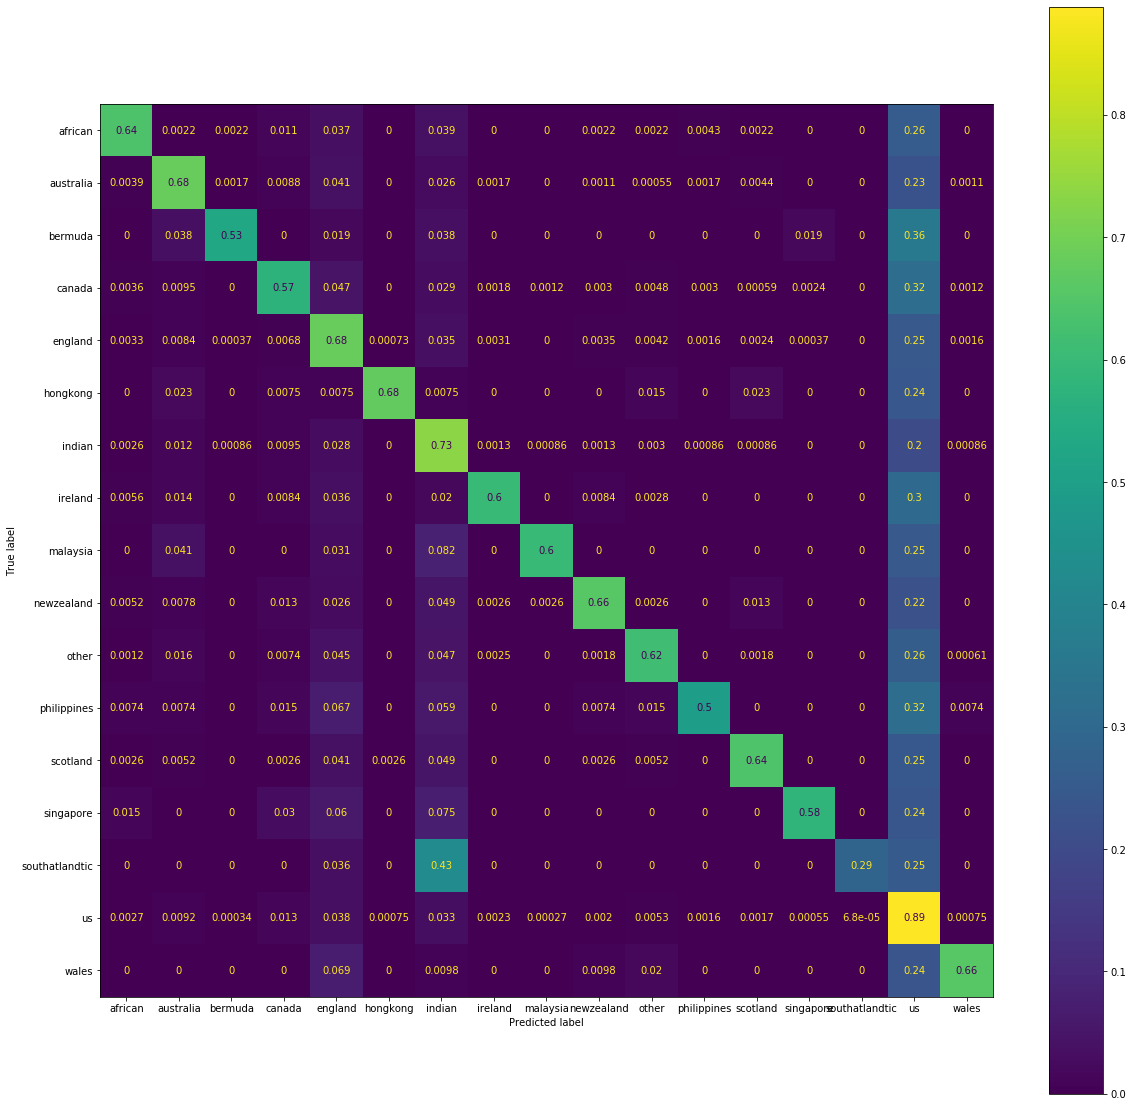

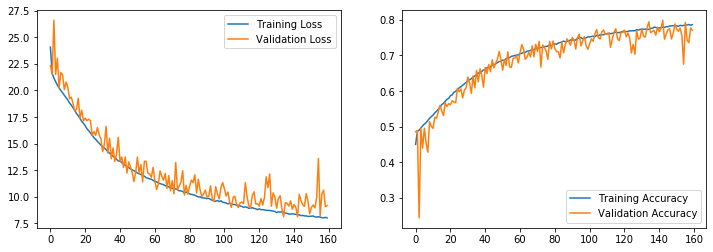

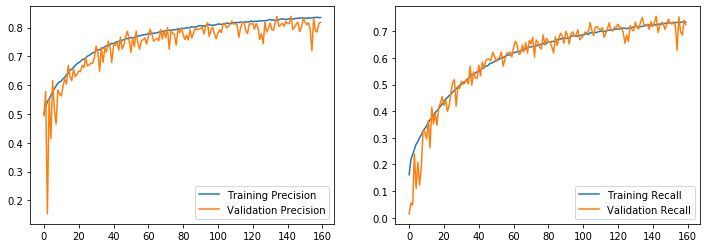

In [13]:
test_scores = ann_model3.evaluate(X_test, y_test)

prediction = ann_model3.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## Fourth ANN Model

In [14]:
# Define the keras model
ann_model4 = keras.models.Sequential()
ann_model4.add(Dense(64, input_dim=45, activation='relu'))

ann_model4.add(Dense(128, activation='relu'))
ann_model4.add(Dense(256, activation=None))
ann_model4.add(BatchNormalization())
ann_model4.add(Activation('relu'))
ann_model4.add(Dropout(0.2))

ann_model4.add(Dense(512, activation='relu'))
ann_model4.add(Dense(1024, activation=None))
ann_model4.add(BatchNormalization())
ann_model4.add(Activation('relu'))
ann_model4.add(Dropout(0.2))

ann_model4.add(Dense(512, activation='relu'))
ann_model4.add(Dense(256, activation=None))
ann_model4.add(BatchNormalization())
ann_model4.add(Activation('relu'))
ann_model4.add(Dropout(0.2))

ann_model4.add(Dense(128, activation='relu'))
ann_model4.add(Dense(64, activation=None))
ann_model4.add(BatchNormalization())
ann_model4.add(Activation('relu'))
ann_model4.add(Dropout(0.2))

ann_model4.add(Dense(32, activation='relu'))
ann_model4.add(Dense(17, activation='softmax', name='output'))

print(ann_model4.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                2944      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)              

In [15]:
ann_model4.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

In [16]:
history = ann_model4.fit(X_train, y_train, epochs=160, batch_size=512, validation_data=(X_val, y_val))

_recall: 0.6990
Epoch 74/160
175/175 [==============================] - 11s 62ms/step - loss: 3.2420 - accuracy: 0.9114 - precision: 0.9244 - recall: 0.9006 - val_loss: 13.9297 - val_accuracy: 0.7438 - val_precision: 0.7566 - val_recall: 0.7340
Epoch 75/160
175/175 [==============================] - 14s 82ms/step - loss: 3.2081 - accuracy: 0.9128 - precision: 0.9248 - recall: 0.9025 - val_loss: 15.7827 - val_accuracy: 0.7041 - val_precision: 0.7188 - val_recall: 0.6923
Epoch 76/160
175/175 [==============================] - 14s 80ms/step - loss: 3.1205 - accuracy: 0.9139 - precision: 0.9262 - recall: 0.9030 - val_loss: 14.9080 - val_accuracy: 0.7140 - val_precision: 0.7304 - val_recall: 0.6999
Epoch 77/160
175/175 [==============================] - 14s 77ms/step - loss: 3.1082 - accuracy: 0.9167 - precision: 0.9285 - recall: 0.9062 - val_loss: 12.9852 - val_accuracy: 0.7513 - val_precision: 0.7652 - val_recall: 0.7400
Epoch 78/160
175/175 [==============================] - 14s 82ms/ste

930/930 [==============================] - 3s 4ms/step - loss: 13.3957 - accuracy: 0.7753 - precision: 0.7839 - recall: 0.7694
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.67      0.73       465
           1       0.79      0.68      0.73      1817
           2       0.82      0.43      0.57        53
           3       0.71      0.62      0.66      1682
           4       0.73      0.75      0.74      5455
           5       0.78      0.64      0.70       133
           6       0.74      0.68      0.71      2323
           7       0.84      0.59      0.69       357
           8       0.78      0.60      0.68        97
           9       0.79      0.61      0.69       384
          10       0.78      0.67      0.72      1632
          11       0.80      0.49      0.61       135
          12       0.74      0.66      0.69       386
          13       0.78      0.48      0.59        67
          14       0.60      0.43      

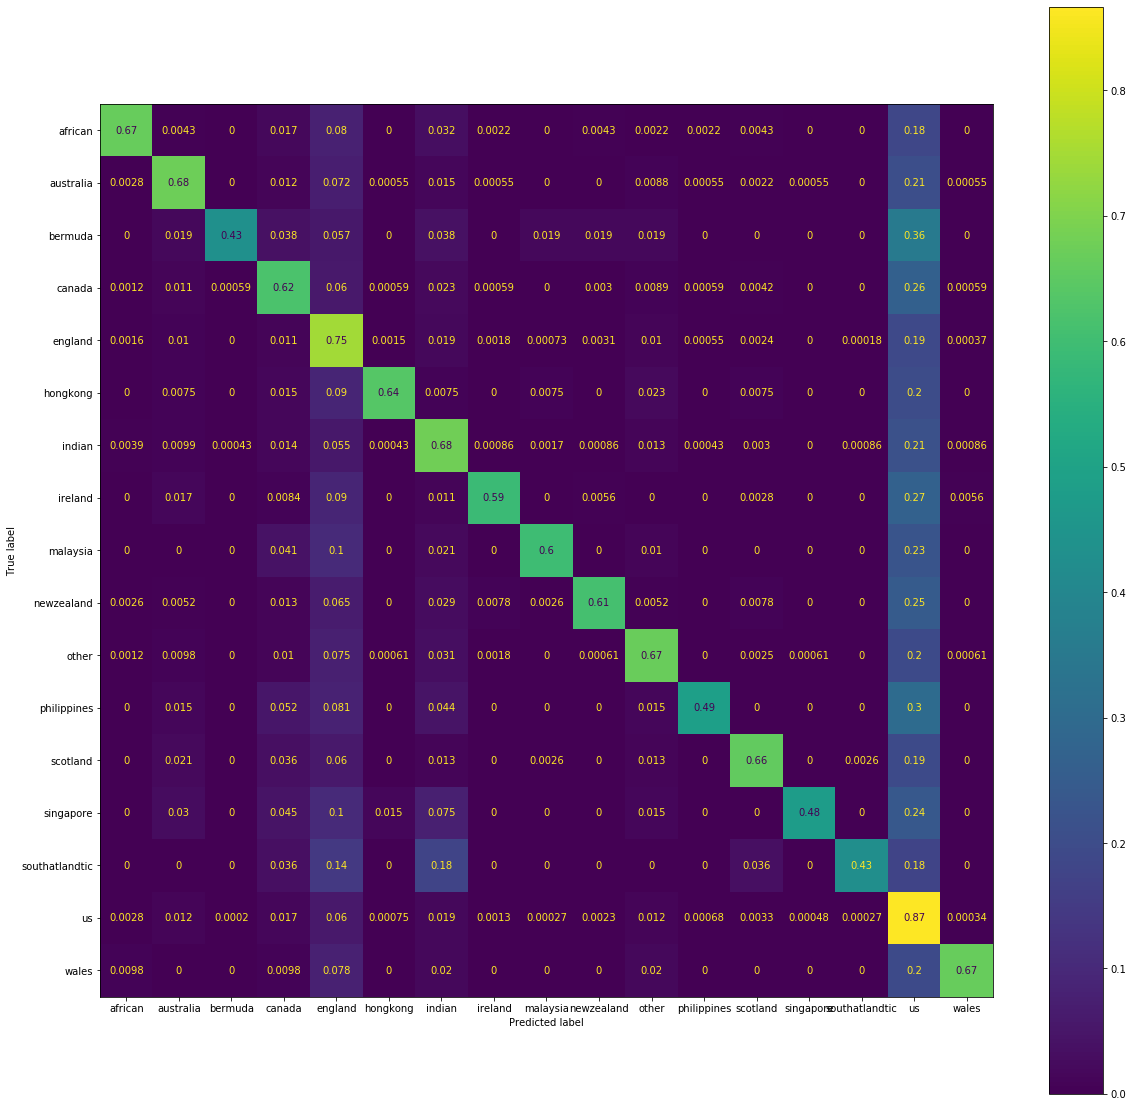

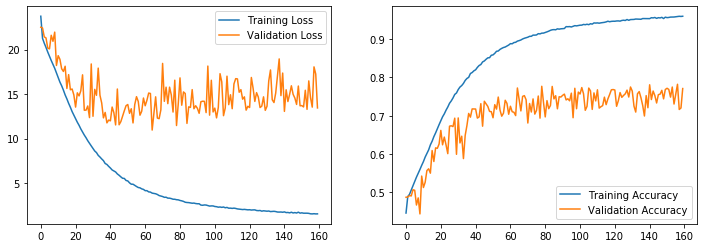

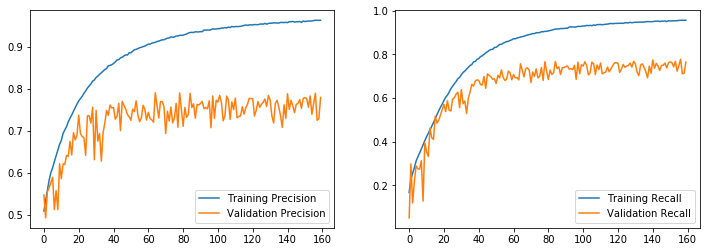

In [17]:
test_scores = ann_model4.evaluate(X_test, y_test)

prediction = ann_model4.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## Fifth Model

In [10]:
# Define the keras model
ann_model5 = keras.models.Sequential()
ann_model5.add(Dense(64, input_dim=45, activation='relu'))

ann_model5.add(Dense(128, activation='relu'))
ann_model5.add(Dense(256, activation=None))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(512, activation='relu'))
ann_model5.add(Dense(1024, activation=None))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(2048, activation='relu'))
ann_model5.add(Dense(1024, activation=None))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(512, activation='relu'))
ann_model5.add(Dense(256, activation=None))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(128, activation='relu'))
ann_model5.add(Dense(64, activation=None))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(32, activation='relu'))
ann_model5.add(Dense(17, activation='softmax', name='output'))

print(ann_model5.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2944      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

In [11]:
ann_model5.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

In [12]:
history = ann_model5.fit(X_train, y_train, epochs=160, batch_size=512, validation_data=(X_val, y_val))

- loss: 2.0630 - accuracy: 0.9453 - precision: 0.9498 - recall: 0.9401 - val_loss: 13.4305 - val_accuracy: 0.7641 - val_precision: 0.7736 - val_recall: 0.7566
Epoch 75/160
175/175 [==============================] - 31s 179ms/step - loss: 2.1048 - accuracy: 0.9445 - precision: 0.9501 - recall: 0.9393 - val_loss: 17.4419 - val_accuracy: 0.7027 - val_precision: 0.7146 - val_recall: 0.6927
Epoch 76/160
175/175 [==============================] - 31s 176ms/step - loss: 2.1013 - accuracy: 0.9451 - precision: 0.9498 - recall: 0.9395 - val_loss: 17.6009 - val_accuracy: 0.7043 - val_precision: 0.7156 - val_recall: 0.6954
Epoch 77/160
175/175 [==============================] - 31s 177ms/step - loss: 2.0206 - accuracy: 0.9457 - precision: 0.9509 - recall: 0.9413 - val_loss: 18.4276 - val_accuracy: 0.6874 - val_precision: 0.6990 - val_recall: 0.6792
Epoch 78/160
175/175 [==============================] - 31s 177ms/step - loss: 2.0315 - accuracy: 0.9456 - precision: 0.9505 - recall: 0.9413 - val_los

930/930 [==============================] - 10s 10ms/step - loss: 16.0771 - accuracy: 0.7584 - precision: 0.7655 - recall: 0.7532
Classification Report

              precision    recall  f1-score   support

           0       0.78      0.63      0.70       465
           1       0.76      0.67      0.71      1817
           2       0.65      0.42      0.51        53
           3       0.70      0.58      0.63      1682
           4       0.73      0.71      0.72      5455
           5       0.89      0.62      0.73       133
           6       0.69      0.68      0.69      2323
           7       0.72      0.57      0.64       357
           8       0.73      0.60      0.66        97
           9       0.72      0.62      0.67       384
          10       0.76      0.67      0.71      1632
          11       0.60      0.39      0.47       135
          12       0.62      0.63      0.62       386
          13       0.79      0.45      0.57        67
          14       0.48      0.43    

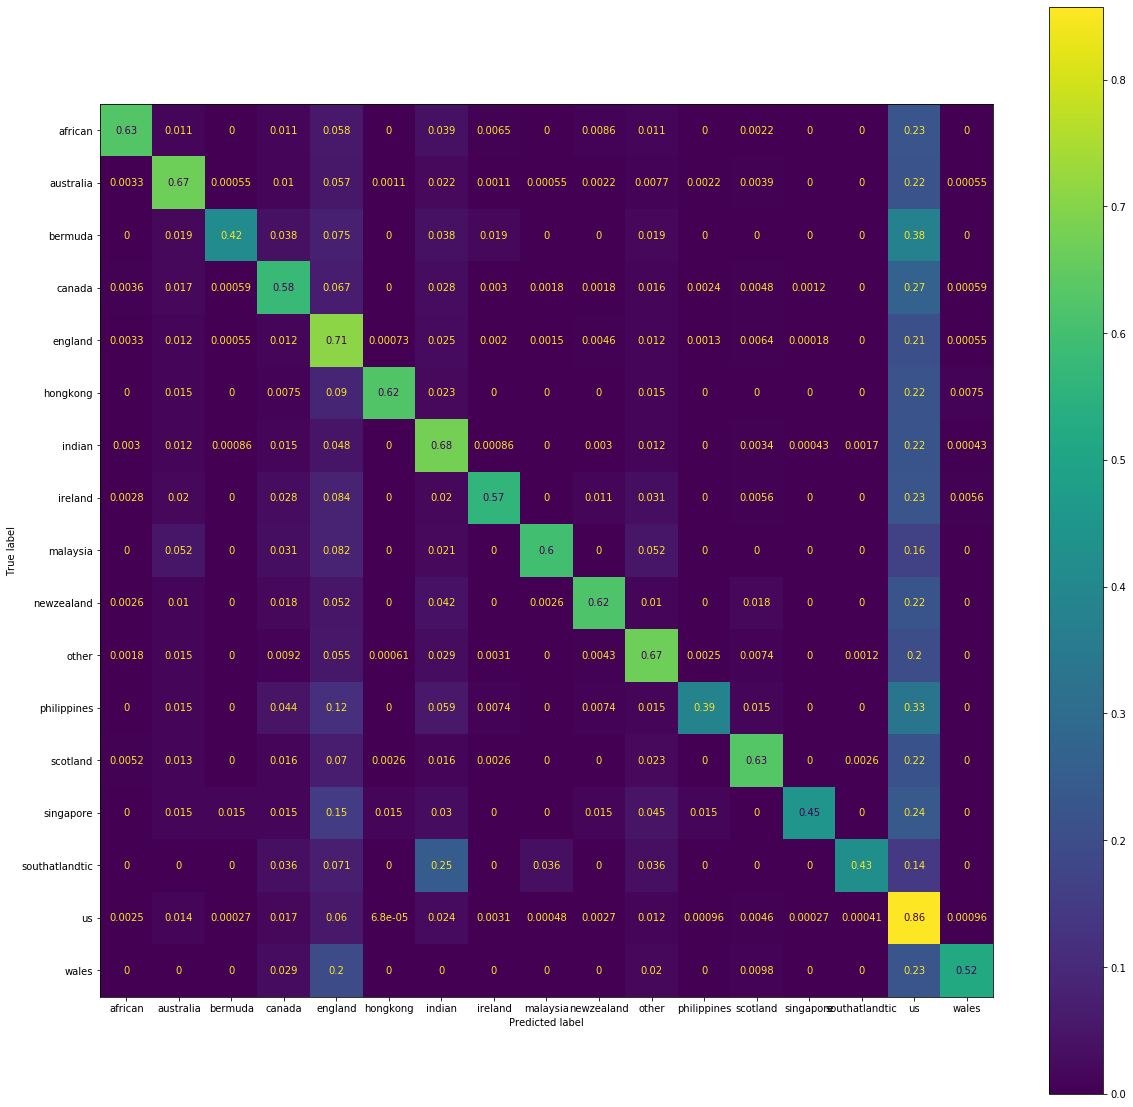

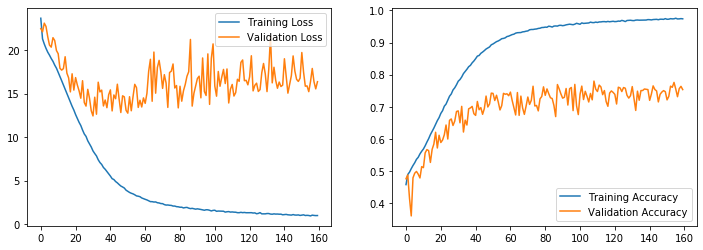

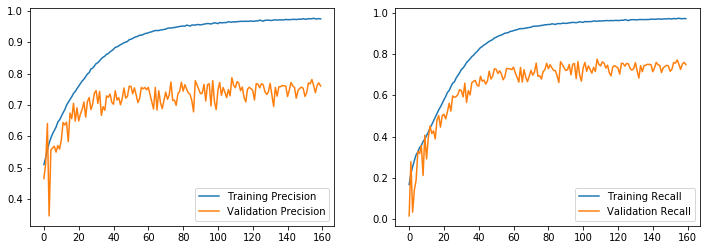

In [13]:
test_scores = ann_model5.evaluate(X_test, y_test)

prediction = ann_model5.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)